<a href="https://colab.research.google.com/github/dhamvi01/Time-Series-using-Auto-Arima-model/blob/main/Auto_Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 1. Import data

The energy data we are going to use here, csv file is place in repository.

In [ ]:
import pandas as pd
data = pd.read_csv('IPG2211A2N.csv',index_col=0)

In [2]:
data.index = pd.to_datetime(data.index)
data.columns = ['Energy Production']

In [3]:
data.shape

(981, 1)

#### 2. data visulization

It good to visulize data before building model, this will help to identify the trend, season, cycles, noise in the series.

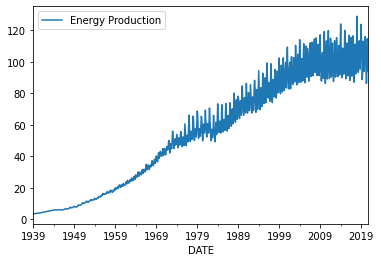

In [29]:
import matplotlib.pyplot as plt
data.plot()

In [30]:
#!pip install pyramid-arima
#from pyramid.arima import auto_arima

#### 3. model building

We are using the stepwise model

In [6]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3922.352, BIC=3946.728, Fit time=6.942 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=4433.196, BIC=4442.946, Fit time=0.093 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=4266.226, BIC=4285.727, Fit time=1.758 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4040.363, BIC=4059.864, Fit time=3.158 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=3919.549, BIC=3948.800, Fit time=10.359 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=4104.491, BIC=4128.867, Fit time=6.716 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3910.575, BIC=3944.701, Fit time=22.192 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=4029.212, BIC=4058.464, Fit time=14.514 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3909.223, BIC=3948.225, Fit time=49.017 seconds
Fit ARIMA: order=(2, 1, 

#### 4. Train test split

let's split the data based on time

In [7]:
train = data.loc['1985-01-01':'2016-12-01']
test = data.loc['2017-01-01':]

In [8]:
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(2, 1, 2, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend='c')

#### 5. Future forecast

We are forecasting the test using trained model.

In [21]:
future_forecast = stepwise_model.predict(n_periods=45)

In [22]:
future_forecast

array([121.50161531, 109.68551921,  99.9188083 ,  89.83840541,
        91.4243315 , 102.6620015 , 112.54493477, 111.86456847,
       100.43219953,  91.30066568,  95.28934509, 111.15580332,
       120.08746211, 110.57862573, 101.48350889,  89.63065672,
        91.39486956, 102.21371657, 111.60903355, 110.47069472,
       100.22699526,  91.27247878,  95.4716718 , 108.70782654,
       119.25808761, 110.33037271, 100.62803451,  89.11508553,
        90.77527092, 102.17105221, 111.61049854, 110.85633553,
       100.51109984,  90.9604591 ,  94.5843824 , 108.44197074,
       119.16532908, 109.78052909,  99.65355492,  88.7714111 ,
        90.33552245, 102.0593792 , 111.64968392, 111.16361339,
       100.43181444])

In [23]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=["Prediction"])

#### 6. Forecast visulization

let's visilize the forecast vs actual values

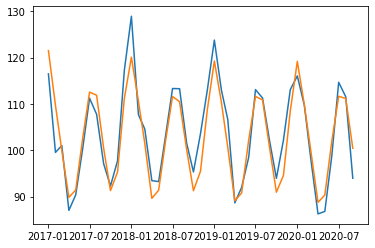

In [25]:
plt.plot(test, label='Test')
plt.plot(future_forecast, label='Valid')
plt.show()

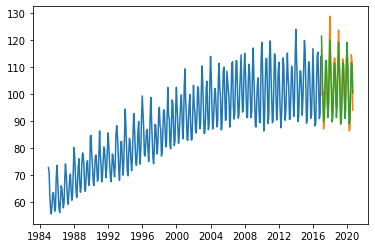

In [28]:
plt.plot(train, label='Train')
plt.plot(test, label='test')
plt.plot(future_forecast, label='Valid')
plt.show()